In [2]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(data_url)\
    .reset_index()\
    .assign(
        t=lambda d: pd.to_datetime(d['Month']),
        value=lambda d: d['Passengers']
    )
df.head()

,index,Month,Passengers,t,value
0,0,1949-01,112,1949-01-01,112
1,1,1949-02,118,1949-02-01,118
2,2,1949-03,132,1949-03-01,132
3,3,1949-04,129,1949-04-01,129
4,4,1949-05,121,1949-05-01,121


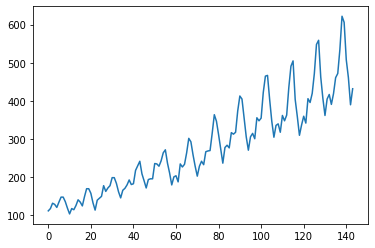

In [4]:
from matplotlib import pyplot as plt
plt.plot(df.index, df.value)

In [8]:
import pymc3 as pm
import theano.tensor as tt

n_changepoints = 10


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, FourierSeasonality(period=365 days 00:00:00)-beta, LinearTrend(n_changepoints=10)-m, LinearTrend(n_changepoints=10)-k, LinearTrend(n_changepoints=10)-delta]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 36 seconds.


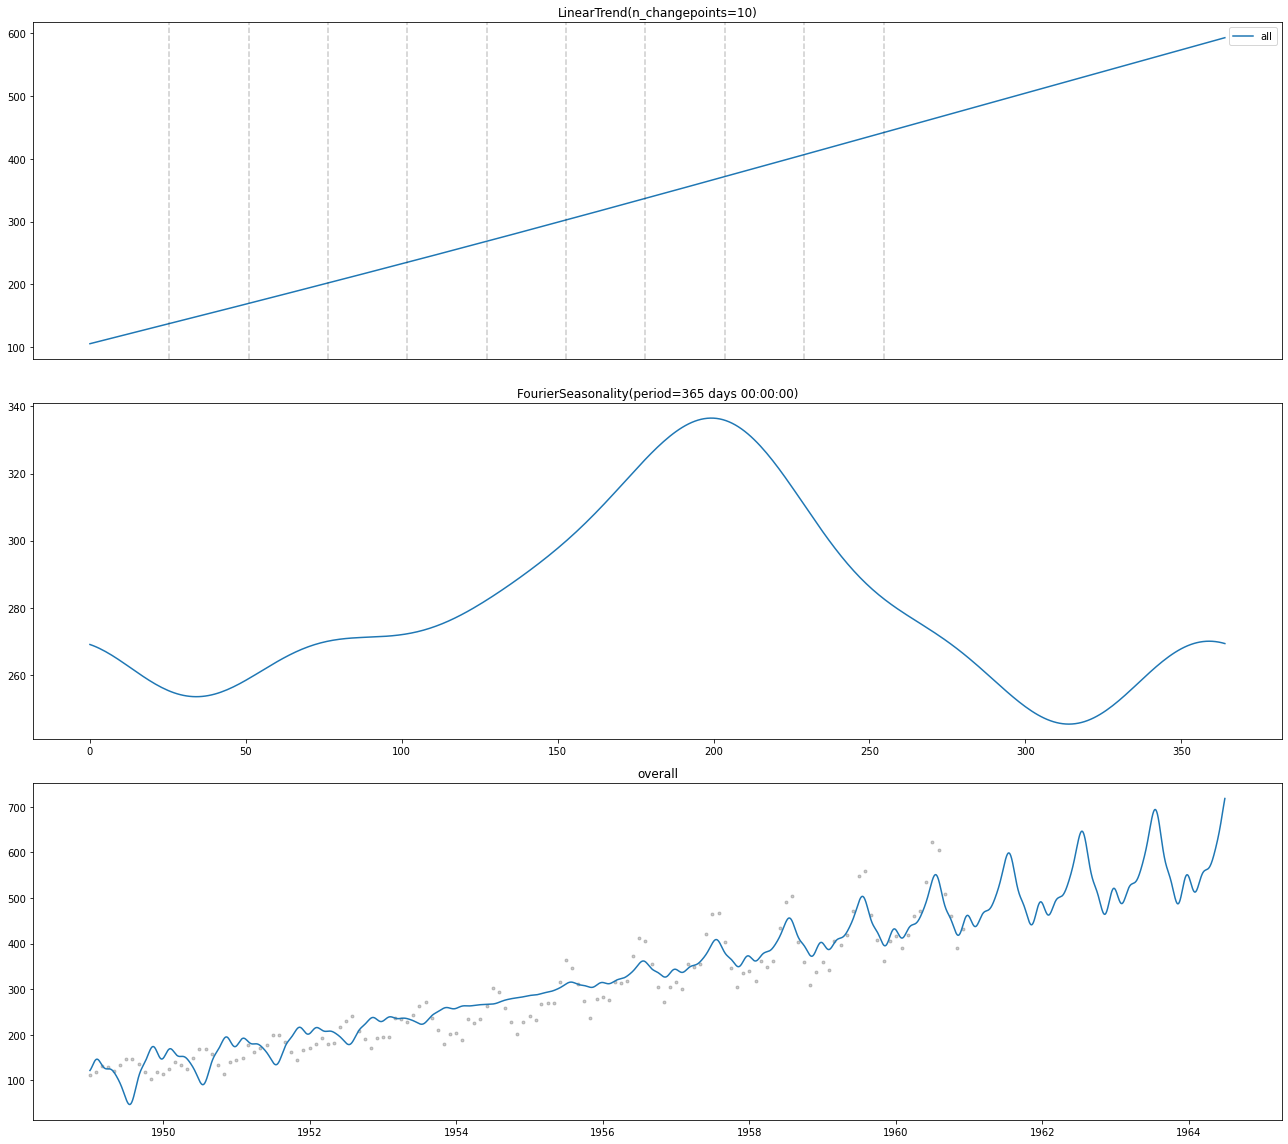

In [11]:
model = LinearTrend(n_changepoints=10) * FourierSeasonality(n=5, period=pd.Timedelta(days=365))
model.fit(data[['t']], data['value'], tune=2000)

model.plot_components(X_true=data, y_true=data['value']);